In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint

In [2]:
df = pd.read_csv("data/metrics.csv")
# df = pd.read_csv("data/antlr4.csv")
# df = pd.read_csv("data/discord4j.csv")
# df = pd.read_csv("data/junit4.csv")
df.head()

,Project,ID,Name,LongName,Parent,Component,Path,Line,Column,EndLine,...,Documentation Metric Rules,Documentation Rules,Error Prone Rules,Inheritance Metric Rules,Multithreading Rules,Performance Rules,Security Rules,Size Metric Rules,isDefective,Unnamed: 92
0,antlr4,L134,Tool,org.antlr.v4.Tool,L500,L103,C:\Users\domco\Desktop\DP\repos\antlr4\tool\sr...,89,1,859,...,80,0,4,0,0,18,0,21,1,NaN
1,antlr4,L125,Antlr4ErrorLog,org.antlr.mojo.antlr4.Antlr4ErrorLog,L107,L103,C:\Users\domco\Desktop\DP\repos\antlr4\antlr4-...,47,1,124,...,0,0,0,0,0,0,0,0,0,NaN
2,antlr4,L199,Antlr4Mojo,org.antlr.mojo.antlr4.Antlr4Mojo,L107,L103,C:\Users\domco\Desktop\DP\repos\antlr4\antlr4-...,77,1,505,...,26,0,2,0,0,1,0,10,0,NaN
3,antlr4,L643,ANTLRFileStream,org.antlr.v4.runtime.ANTLRFileStream,L507,L103,C:\Users\domco\Desktop\DP\repos\antlr4\runtime...,42,1,86,...,11,0,1,0,0,1,0,2,0,NaN
4,antlr4,L645,ANTLRInputStream,org.antlr.v4.runtime.ANTLRInputStream,L507,L103,C:\Users\domco\Desktop\DP\repos\antlr4\runtime...,47,1,246,...,33,2,0,0,0,1,0,7,0,NaN


## Take the working set of reatures
NOA: Number of Attributes <br>
NOP: Number of Parameters <br>
NOC: Number of Children <br>
CBO: Coupling Between Objects <br>
DIT: Depth Inheritance Tree <br>
RFC: Response for a Class <br>
LCOM5: Lack of Cohesion of Methods <br>
<i>Labels</i><br>
1, if LOC<=75; 0 otherwise<br>

In [3]:
# Data preparation
features = df[['NOA', 'NOP', 'NOC', 'CBO', 'DIT', 'RFC', 'LCOM5']]
labels = [(loc <= 75) for loc in df['LOC']]

# Saving feature names for later use
feature_list = list(features.columns)

In [4]:
# Convert to numpy array
features = np.array(features)
labels = np.array(labels)

In [5]:
# Split the data into training and testing set
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42) 

# Quick sanity check with the shapes of Training and testing datasets
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1679, 7)
Training Labels Shape: (1679,)
Testing Features Shape: (720, 7)
Testing Labels Shape: (720,)


## Hyperparameter Tuning

In [6]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter = 5, 
                                 cv = 5)

# Fit the random search object to the data
rand_search.fit(train_features, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000254FF6723A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000254F9C21F10>})

In [7]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 202}


## Make prediction

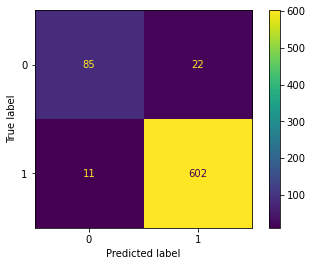

In [8]:
# Use the forest's predict method on the test data
predictions = best_rf.predict(test_features)

# Create the confusion matrix
cm = confusion_matrix(test_labels, predictions)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Finding the accuracy of the model

In [9]:
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)

print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))

Accuracy: 0.95
Precision: 0.96
Recall: 0.98


## Features importance

In [10]:
# Get numerical feature importances
importances = list(best_rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: RFC                  Importance: 0.66
Variable: CBO                  Importance: 0.2
Variable: LCOM5                Importance: 0.09
Variable: NOC                  Importance: 0.02
Variable: NOA                  Importance: 0.01
Variable: NOP                  Importance: 0.01
Variable: DIT                  Importance: 0.01
